### ID1: 305674731
### ID2: 209028067
### Date: 23.12.24

##### Advanced Statistical Analysis and Model-Based Learning (Fall 2024-2025)
# Home Assignment 3
#### Topics:
- Statistical Estimation
- Hypothesis Testing in one and two samples
- ANOVA

#### Due: 23/12/2024 by 18:30

#### Instructions:
- Write your IDs and date at the top cell.
- Submit a copy of this notebook with code filled in the relevant places as the solution of coding exercises.
- For theoretic exercises, you can either write your solution in the notebook using $\LaTeX$ (preferred) or submit additional notes.

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import t
from scipy.stats import chi2
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import f, ttest_rel, ttest_ind

<hr>
<hr>

## Problem 1 (Correlated Data)

Suppose that $Y_1,\ldots,Y_n$ has each mean $\mu$ and variance $\sigma^2$, but
$$
\rho_{ij} := \mathrm{Corr}(Y_i,Y_j) = \begin{cases}
1 & i=j \\
\rho & |i-j| = 1 \\
0 & |i-j| > 1
\end{cases}.
$$
This situation arises when an observation $i$ may depend to some extent on only the previous observation’s white noise: a one-lag "holdover effect". This is also known as the "lag-1 moving average" model (MA(1)).

1. Show that:
  1.1. $$\mathrm{Var}(\bar{Y}) = \frac{\sigma^2}{n}(1+ 2\rho \frac{n-1}{n})$$
Namely, positive correlation increases varaince. Hint: use that $\mathrm{Var}(U+V) = \mathrm{Var}(U) + \mathrm{Var}(V) + 2 \mathrm{Cov}(U,V)$ and induction or recursive computation over $n$. Another option is to write $Y = \Sigma^{1/2}Z$ where $Z\sim \mathcal N(0,I)$ and $\Sigma^{1/2}$ is symmetric with $\Sigma^{1/2}\Sigma^{1/2} = \Sigma$ has the desired covariance stracture.  

  1.2. $\mathbb E[s^2] = \sigma^2(1 - 2\rho/n)$, where $s^2$ is the standard variance estimate.
Namely, with positive correlation the "variety" in the data is smaller.

  1.3. **(Bonus)** The t-statistic statisfies
$$
t = \sqrt{n} \frac{\bar{Y}-\mu}{s} \to \mathcal N(0,1 + 2 \rho),\quad n \to \infty
$$
Hint: you may use the following version of Slutsky's Theorem: for two sequences of RV $U_n$ and $V_n$, if $U_n \overset{D}{\to} U$ and $V_n \overset{p}{\to} c$ (constant), then $V_n U_n \overset{D}{\to} cU$

2. Verify your answer to the first two items in 1 using simulations. Use `nMonte = 10000` problem instances. In each instance, use a sample size of `n = 10` with $\sigma=1$ and $\rho \in \{\pm 0.1, \pm 0.3, \pm0.5\}$. The function `genrate_correlated_data` below generates noramlly distributed data satisfying the correlation model above.

3. Suppose $\rho>0$

 3.1. Derive a $1-\alpha$ confidence interval based on $s$ and the $t$-distribution with $n-1$ DoF. Does your interval
 contain the value of $\mu$ more or less often than $1-\alpha$? Verify using a simulation with `nMonte = 10000` problem instances of sampes size `n=100`. Also use $\alpha=0.05$, $\rho=.25$, $\sigma =1$, and $\mu_0=2$.

 3.2. Suppose that we reject $H_0\,:\,\mu = \mu_0$ whenever $|t|$ exceeds the critical value $t_{n-1}^{1-\alpha/2}$. Would our P-value be too small or too large? Would we reject more or less often then $\alpha$ if the null $\mu = \mu_0$ is true? Verify using a simulation with `nMonte = 10000` problem instances of sampes size `n=100`. Also use $\alpha=0.05$, $\rho=.25$, $\sigma =1$, and $\mu_0=2$.

 3.3. Would your answer to the preivous two items change if $\rho < 0$? how?

The point: correlation in our data is bad because it makes us make wrong descisions. The effect of correlation is much worst than non-nomrality since the latter diminishes with $n$ due to the CLT.


---
## **Answer 1**:
### **1.1**

We want to show that $$Var(\bar{Y})= \frac{σ^2}{n}(1+2ρ\frac{n-1}{n}) $$

Lets start:

$$Var(\bar{Y})=Var(\frac{1}{n}\sum_{i=1}^nY_i) = \frac{1}{n^2}Var(\sum_{i=1}^nY_i)$$

We know that

$$ Var(\sum_{i=1}^nY_i) = \sum_{i=1}^nVar(Y_i)+\sum_{i\neq{j}}Cov(Y_i \ , Y_j) $$

Note: the var terms ($i=j$) are included directly as $Var(Y_i)=σ^2$. These terms don’t depend on $ρ$ because they are intrinsic to the individual variables $Y_i$. Thats the resone why we sum over $i \neq{j}$.

Each $Y_i$ has var $σ^2$:

$$ \sum_{i=1}^nVar(Y_i) = nσ^2 $$

And now let calc the cov:

$$ Cov(Y_i \ , Y_j)  = Corr(Y_i \ , Y_j)·\sqrt{Var(Y_i)Var(Y_j)}= ρ_{ij}σ^2 $$

when $|i-j|=1$ we get $ρ_{ij}=ρ $ , else  $ρ_{ij}=0 $.

Thus we sum only the cov of adj paris $(1,2),(2,3).....(n-1,n)$ - in total we have $n-1$ pairs. and from the simarty we get

$$\sum_{i\neq{j}}Cov(Y_i \ , Y_j) = 2(n-1)ρσ^2 $$

Combine everything together we get:
$$Var(\bar{Y}) = \frac{1}{n^2}(nσ^2 + 2(n-1)ρσ^2)= \frac{σ^2}{n^2}(n+2(n-1)ρ) =
\frac{σ^2}{n}(1+2\frac{n-1}{n}ρ) $$

### **1.2**

We want so show that $$E[s^2] =σ^2(1-\frac{2ρ}{n}) $$


Lets start :)

$$s^2 = \frac{1}{n-1}\sum_{i=1}^n(y_i-\bar{Y})^2 =
\frac{1}{n-1}\sum_{i=1}^n(y_i^2-2y_i\bar{Y}+\bar{Y}^2)=
\frac{1}{n-1}[\sum_{i=1}^n(y_i^2)-2\bar{Y}\sum_{i=1}^ny_i+n\bar{Y}^2]=
\frac{1}{n-1}[\sum_{i=1}^n(y_i^2)-2\bar{Y}n\bar{Y}+n\bar{Y}^2]=
\frac{1}{n-1}[\sum_{i=1}^n(y_i^2)-\bar{Y}n\bar{Y}]=
$$


Now if we look at the expected value of $s^2$ we get:

$$E[s^2]=E[\frac{1}{n-1}[\sum_{i=1}^n(y_i^2)-\bar{Y}n\bar{Y}]] =
 \frac{1}{n-1}[\sum_{i=1}^nE[y_i^2]-nE[\bar{Y}^2]]$$

 Calc each part:

 - $E[y_i^2] = var(y_i)+ (E[y_i])^2=σ^2+μ^2$
 - $E[\bar{Y}^2]=var(\bar{Y}^2)+E[\bar{Y}]^2=\frac{σ^2}{n}(1+2ρ\frac{n-1}{n})+μ^2$


Combine all togehter:
$$E[s^2]= \frac{1}{n-1}[n(σ^2+μ^2)-n(\frac{σ^2}{n}(1+2ρ\frac{n-1}{n})+μ^2)]=
\frac{1}{n-1}[nσ^2-(σ^2(1+2ρ\frac{n-1}{n}))]=
\frac{1}{n-1}[(n-1)σ^2-σ^22ρ\frac{n-1}{n}]=
[σ^2-σ^22ρ\frac{1}{n}]=
σ^2[1-\frac{2ρ}{n}]$$





### **1.3**

We want to show that:
 $$t = \sqrt{n} \frac{\bar{Y}-\mu}{s} \to \mathcal N(0,1 + 2 \rho),\quad n \to \infty$$

 Lets look at the N and the D sepratly:

 $$ E[\sqrt{n}(\bar{Y}-\mu)] = 0$$

 $$ Var(\sqrt{n}(\bar{Y}-\mu) = Var(\sqrt{n}\bar{Y})= σ^2(1+2ρ) $$

 We can conclud that:

 $$ \sqrt{n}(\bar{Y}-\mu) →^D  \mathcal N(0, σ^2(1+2ρ))$$

 From the prev sections we know that:

 $$ s= \sqrt{s^2} $$

 $$ E[S^2]= σ^2[1-\frac{2ρ}{n}] $$

 and when $n → ∞$ we get:
 $$ E[S^2]= σ^2$$

The law of large numbers ensures that $s^2 →^pσ^2$ in probability and then $s →^pσ$


Let define:

$$U_n= \sqrt{n}(\bar{Y}-\mu) $$
$$V_n = \frac{1}{s} $$

from the Slutsky’s Theorem, we know that if:

$$U_n →^D U  (a- distributional-limit)$$
$$V_n →^P C $$  

Then: $V_nU_n →^D CU $

In our case we get:

 $$t = \sqrt{n} \frac{\bar{Y}-\mu}{s} =
 (\sqrt{n}(\bar{Y}-\mu))⋅\frac{1}{s} →^D \mathcal N(0, 1+2ρ)$$










### **2**


In [ ]:
def generate_correlated_data(n: int, rho: float, mu: float, sigma: float) -> np.ndarray:
    """
    Generate samples from the model:
    Yi ~ N(mu, sigma^2) and Corr(Yi,Yj) = ( i == j ) + rho * ( abs( i - j ) == 1 )

    Args:
    -----
    :n:     sample size
    :rho:   desired one lag correlation between samples
    :mu:    mean
    :sigma: standard deviation

    """
    assert sigma > 0

    # build desired covariance matrix
    Sig = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            if i==j :
                Sig[i,j] = 1
            if np.abs(i-j) == 1:
                Sig[i,j] = rho
                Sig[j,i] = rho

    # get matrix square root of covariance matrix:
    Sig_sqrt = np.linalg.cholesky(sigma**2 * Sig)

    # sample from the standard normal dist. and transform
    # so that the result is a normal vector with the desired
    # covariance structure
    return mu + Sig_sqrt @ np.random.randn(n)

In [ ]:
# simulation parms
nMonte = 10000
n = 10
sigma = 1
mu = 0
rho_values = [-0.5, -0.3, -0.1, 0.1, 0.3, 0.5]

In [ ]:
# calc sample var
results = []
for rho in rho_values:
    var_means = []
    var_estimates = []
    for _ in range(nMonte):
        data = generate_correlated_data(n, rho, mu, sigma)
        sample_mean = np.mean(data)
        sample_var = np.var(data, ddof=1)  # unbiased var estimate

        var_means.append(sample_mean)
        var_estimates.append(sample_var)

    # theoretical values
    theoretical_var_mean = sigma**2 / n * (1 + 2 * rho * (n - 1) / n)
    theoretical_var_estimate = sigma**2 * (1 - 2 * rho / n)

    results.append({
        'rho': rho,
        'simulated_var_mean': np.var(var_means),
        'theoretical_var_mean': theoretical_var_mean,
        'simulated_var_estimate': np.mean(var_estimates),
        'theoretical_var_estimate': theoretical_var_estimate
    })

In [ ]:
results_df = pd.DataFrame(results)
results_df

,rho,simulated_var_mean,theoretical_var_mean,simulated_var_estimate,theoretical_var_estimate
0,-0.5,0.010038,0.010,1.100328,1.10
1,-0.3,0.046152,0.046,1.056706,1.06
2,-0.1,0.081470,0.082,1.023927,1.02
3,0.1,0.121362,0.118,0.978548,0.98
4,0.3,0.154639,0.154,0.942963,0.94
5,0.5,0.188240,0.190,0.891609,0.90


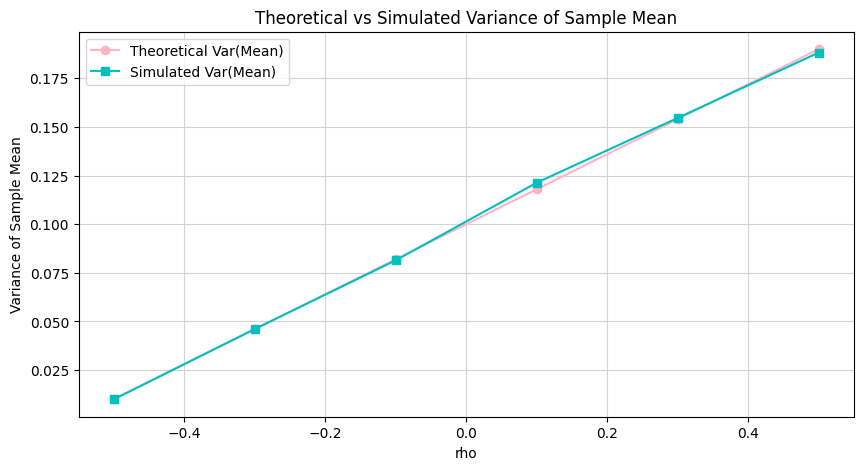

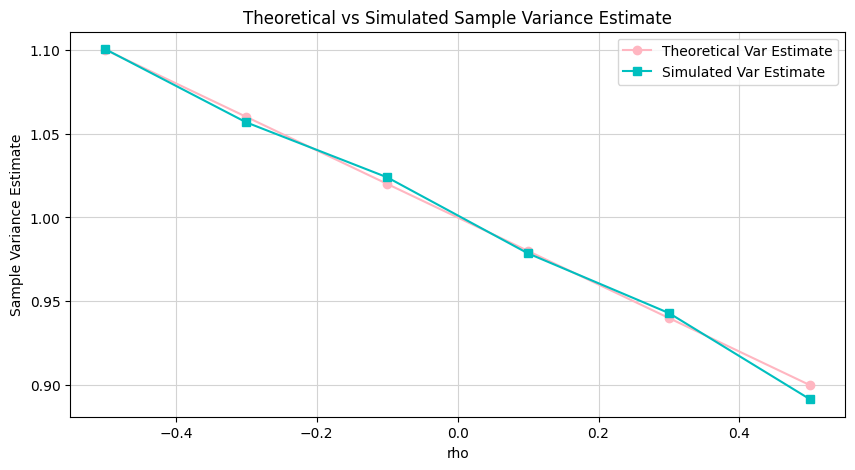

In [ ]:
# variance of the Sample Mean
plt.figure(figsize=(10, 5))
plt.plot(rho_values, results_df['theoretical_var_mean'], 'o-', label='Theoretical Var(Mean)',color='lightpink')
plt.plot(rho_values, results_df['simulated_var_mean'], 's-', label='Simulated Var(Mean)',color='c')
plt.xlabel('rho')
plt.ylabel('Variance of Sample Mean')
plt.title('Theoretical vs Simulated Variance of Sample Mean')
plt.legend()
plt.grid(color='lightgray')

# variance Estimate
plt.figure(figsize=(10, 5))
plt.plot(rho_values, results_df['theoretical_var_estimate'], 'o-', label='Theoretical Var Estimate',color='lightpink')
plt.plot(rho_values, results_df['simulated_var_estimate'], 's-', label='Simulated Var Estimate',color='c')
plt.xlabel('rho')
plt.ylabel('Sample Variance Estimate')
plt.title('Theoretical vs Simulated Sample Variance Estimate')
plt.legend()
plt.grid(color='lightgray')

plt.show()


The table and plots above show a clear agreement between the simulated and theoretical variances of the sample mean across different values of $ρ$.

### **3.1**

The $1-α$ confidence interval for the mean $μ$ using the t-distribution with $n-1$ Dof:

$[\bar{Y}-t_{n-1 \ , \frac{α}{2}}·\frac{s}{\sqrt{n}} \ , \bar{Y}+t_{n-1 \ , \frac{α}{2}}·\frac{s}{\sqrt{n}}]$

In [ ]:
# simulation prams
n = 100
rho = 0.25
sigma = 1
mu_0 = 2
alpha = 0.05
nMonte = 10000

# critical value for the t-distribution
t_crit = t.ppf(1 - alpha / 2, df=n - 1)

In [ ]:
# CI simulation
contained_count = 0
for _ in range(nMonte):
    # generate data
    sample = generate_correlated_data(n, rho, mu_0, sigma)

    # calc sample mean and standard deviation
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)

    # calc confidence interval
    margin_of_error = t_crit * (sample_std / np.sqrt(n))
    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error

    # if true mean is within the interval
    if lower_bound <= mu_0 <= upper_bound:
        contained_count += 1

# proportion of intervals containing the true mean
coverage_proportion = contained_count / nMonte

In [ ]:
print(f"The number of intervals containing the true mean = {contained_count} out of {nMonte}")
print(f"Proportion of intervals containing the true mean: {coverage_proportion:.4f}")
print(f"Expected coverage: {1 - alpha}")

The number of intervals containing the true mean = 8825 out of 10000
Proportion of intervals containing the true mean: 0.8825
Expected coverage: 0.95


### **3.2**

In this part we are doing hypothesis testing when:

$$H_0 : μ = \mu_0 $$
$$ H_1 : μ \neq \mu_0$$

We will reject $H_0$ is $|t|>t_{n-1 \ , \frac{α}{2}}$

In [ ]:
# simulation for hypothesis testing
reject_count = 0
for _ in range(nMonte):
    # generate data
    sample = generate_correlated_data(n, rho, mu_0, sigma)

    # calc sample mean and standard deviation
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)

    # calc t-statistic
    t_stat = (sample_mean - mu_0) / (sample_std / np.sqrt(n))

    # if t-statistic exceeds critical value
    if np.abs(t_stat) > t_crit:
        reject_count += 1

rejection_proportion = reject_count / nMonte

In [ ]:
print(f"The number of rejection  = {reject_count} out of {nMonte}")
print(f"Proportion of rejections: {rejection_proportion:.4f}")
print(f"Expected rejection rate under null hypothesis: {alpha}")

The number of rejection  = 1049 out of 10000
Proportion of rejections: 0.1049
Expected rejection rate under null hypothesis: 0.05


### **3.3**
When $ρ<0$ , the answers to the previous two items would change because the negative correlation between adjacent samples affects the variance of the sample mean and the behavior of the t-statistic.

- CI : when the samples are negatively correlaed, this reduces the effective variance of the sample mean, leading to narrower confidence intervals. Narrower intervals are expected to cover the true mean less frequently than $1-α$


- HT:  the reduced variance makes the test more aggressive. The t-statistic is inflated, leading to a higher rejection rate than $α$.




---



---



## Problem 2 (Variance Estimation)

Consider the variance estimate
$$
s^2 = \frac{1}{n-1} \sum_{i=1}^n(y_i - \bar{y})^2.
$$
If $y_i \sim \mathcal N(\mu,\sigma^2)$ independently, then
$$
\frac{n-1}{\sigma^2}s^2 \sim \chi^2_{n-1}.
$$
1. Use this information to derive a $1-\alpha$ confidence interval for $\sigma^2$ (express $L$ and $U$ in terms of $s^2$, $n$, and the relevant quantiles of the $\chi^2$ distribution).
2. For $n = 2,\ldots,10$ and $\alpha=0.05$, report on the lower ($L$) and upper ($U$) values of the confidence interval in terms of $s^2$.
3. How large $n$ must be to obtain a $0.95$ confidence interval of size $0.1s^2$?

The point: the number of degrees of freedom needed for a reasonable ($10\%$ range) estimate of the variance can be very large. Sometimes, much larger than our data permit.


## **Answer 2**:

**2.1)** We have
$$
\frac{(n-1)s^2}{\sigma^2} \sim \chi^2_{n-1}.
$$
For a $1 - \alpha$ confidence interval, we use the fact that
$$
P\Bigl(\chi^2_{n-1,\alpha/2} \le \frac{(n-1)s^2}{\sigma^2} \le \chi^2_{n-1,1-\alpha/2}\Bigr) = 1-\alpha.
$$
Solving for $\sigma^2$, the interval is:
$$
L = \frac{(n-1)s^2}{\chi^2_{n-1,1-\alpha/2}},
\quad
U = \frac{(n-1)s^2}{\chi^2_{n-1,\alpha/2}}.
$$

Hence the $(1-\alpha)$ confidence interval is
$$
\Bigl[L, U\Bigr]
=
\Bigl[
\frac{(n-1)s^2}{\chi^2_{n-1,1-\alpha/2}},
\frac{(n-1)s^2}{\chi^2_{n-1,\alpha/2}}
\Bigr].
$$

---

**2.2)** Because $\alpha = 0.05$, we have $\alpha/2 = 0.025$ and $1 - \alpha/2 = 0.975$. The confidence interval is
$$
\Bigl[
\frac{(n-1)s^2}{\chi^2_{n-1,0.975}},\; \frac{(n-1)s^2}{\chi^2_{n-1,0.025}}
\Bigr].
$$
Below is the code to compute the coefficients in front of $s^2$. Note that
- Lower Coeff = $\frac{(n-1)}{\chi^2_{n-1,0.975}}$
- Upper Coeff = $\frac{(n-1)}{\chi^2_{n-1,0.025}}$

In [ ]:
# 2.2
alpha = 0.05
df_list = np.arange(1, 10)  # df = n-1, so for n from 2 to 10
lower_vals = []
upper_vals = []

for df in df_list:
    chi2_lower = chi2.ppf(1 - alpha/2, df)  # chi^2_{df, 0.975}
    chi2_upper = chi2.ppf(alpha/2, df)      # chi^2_{df, 0.025}
    L = df / chi2_lower
    U = df / chi2_upper
    lower_vals.append(L)
    upper_vals.append(U)

print(" n | df=n-1 |   Lower Coeff    |   Upper Coeff")
for i, df in enumerate(df_list, start=2):
    print(f"{i:2d} |   {df:2d}    | {lower_vals[df-1]:14.6f} | {upper_vals[df-1]:14.6f}")

 n | df=n-1 |   Lower Coeff    |   Upper Coeff
 2 |    1    |       0.199049 |    1018.258270
 3 |    2    |       0.271085 |      39.497890
 4 |    3    |       0.320910 |      13.902065
 5 |    4    |       0.358961 |       8.257322
 6 |    5    |       0.389636 |       6.015315
 7 |    6    |       0.415243 |       4.849095
 8 |    7    |       0.437151 |       4.142332
 9 |    8    |       0.456242 |       3.670178
10 |    9    |       0.473117 |       3.332853


###**2.3)**

In [ ]:
# 2.3
def interval_size_factor(df):
    c025 = chi2.ppf(0.025, df)
    c975 = chi2.ppf(0.975, df)
    return (1/c025 - 1/c975)

target = 0.1
for n in range(2, 100000):
    df = n - 1
    val = df * interval_size_factor(df)
    # We check when it first becomes <= 0.1 or near 0.1
    if val <= target:
        print("n =", n, " => To obtain 0.95 confidence interval of size 0.1*s^2")
        break


n = 3082  => To obtain 0.95 confidence interval of size 0.1*s^2




---



---



## Problem 3 (two-sample testing)
Consider the following two-sample problem. The data is
$$
y_{ij} = \mu_i + \epsilon_{ij},\qquad j=1,\ldots,n_i,\quad i=0,1.
$$

1. Find the statistic $t$ for the two-sample $t$ test (using the observable variables)
2. Write the ANOVA table for $k=2$ and find the F statistic $F$ (using the observable variables)
3. Conclude that $t^2 = F$.
4. Does the test that rejects when $|t| > t_{n-1}^{1-\alpha/2}$ has larger power than the test that rejects when $F > F_{1,n-1}^{1-\alpha}$ ? less? same?


### **Answer 3:**
**3.1) Derivation of the two-sample $t$ statistic**  
Given two independent samples from populations indexed by $i = 0$ and $i = 1$, with observations
$$
y_{ij} = \mu_i + \epsilon_{ij},
\quad
j=1,\dots,n_i,
\quad
i=0,1,
$$
the usual two-sample $t$-test statistic is derived under the assumptions that $\epsilon_{ij}\sim N(0,\sigma^2)$ and are independent across $i$ and $j$. Let
$$
\bar{y}_0 = \frac{1}{n_0}\sum_{j=1}^{n_0} y_{0j},
\quad
\bar{y}_1 = \frac{1}{n_1}\sum_{j=1}^{n_1} y_{1j},
$$
be the sample means, and
$$
S_0^2 = \frac{1}{n_0 - 1}\sum_{j=1}^{n_0} (y_{0j}-\bar{y}_0)^2,
\quad
S_1^2 = \frac{1}{n_1 - 1}\sum_{j=1}^{n_1} (y_{1j}-\bar{y}_1)^2,
$$
be the unbiased estimators for the variances in each group. The pooled variance estimator is
$$
S_p^2
= \frac{(n_0 - 1)S_0^2 + (n_1 - 1)S_1^2}{n_0 + n_1 - 2}.
$$
Then the two-sample $t$-statistic for testing $H_0: \mu_0 = \mu_1$ is
$$
t
= \frac{\bar{y}_1 - \bar{y}_0}{\sqrt{S_p^2\Bigl(\frac{1}{n_0} + \frac{1}{n_1}\Bigr)}} = \frac{\bar{y}_1 - \bar{y}_0}{\hat{S}\sqrt{\frac{1}{n_0} + \frac{1}{n_1}}}.
$$


**3.2) ANOVA table for $k=2:$**  
When comparing two means ($k=2$), one can also use the one-way ANOVA framework. Let $n = n_0 + n_1$. Denote the grand mean
$$
\bar{y} = \frac{1}{n} \Bigl(\sum_{j=1}^{n_0} y_{0j} + \sum_{j=1}^{n_1} y_{1j}\Bigr).
$$
Define:
$$
\text{SS}_\text{Between}
= n_0(\bar{y}_0 - \bar{y})^2 + n_1(\bar{y}_1 - \bar{y})^2,
$$
$$
\text{SS}_\text{Within}
= \sum_{i=0}^1 \sum_{j=1}^{n_i} (y_{ij}-\bar{y}_i)^2,
\quad
\text{SS}_\text{Total} = \text{SS}_\text{Between} + \text{SS}_\text{Within}.
$$
The corresponding degrees of freedom $df$ and mean squares $MS$ lead to the following table:

| Source    | df       | SS                     | MS = SS/df                                           | F                                            |
|-----------|----------|------------------------|------------------------------------------------------|----------------------------------------------|
| Between   | $1$      | $\text{SS}_{\text{Between}}$  | $\text{MS}_{\text{Between}} = \frac{\text{SS}_{\text{Between}}}{1}$    | $\frac{\text{MS}_{\text{Between}}}{\text{MS}_{\text{Within}}}$ |
| Within    | $n - 2$  | $\text{SS}_{\text{Within}}$   | $\text{MS}_{\text{Within}} = \frac{\text{SS}_{\text{Within}}}{n-2}$    |                                              |
| Total     | $n - 1$  | $\text{SS}_{\text{Total}}$     | —                                                  | —                                            |

The resulting $F$-statistic for testing $H_0:\mu_0 = \mu_1$ is:
$$
F
\;=\;
\frac{\text{MS}_{\text{Between}}}{\text{MS}_{\text{Within}}}
\;=\;
\frac{\tfrac{\text{SS}_{\text{Between}}}{1}}{\tfrac{\text{SS}_{\text{Within}}}{n-2}}.
$$

**Explanation:**
The $F$-statistic is the ratio of the Mean Square Between groups ($\text{MS}{\text{Between}}$) to the Mean Square Within groups ($\text{MS}{\text{Within}}$). This ratio assesses whether the variability between the group means is significantly greater than the variability within the groups. Under the null hypothesis $H_0: \mu_0 = \mu_1$, the $F$-statistic follows an $F$-distribution with $1$ and $n - 2$ degrees of freedom. A larger $F$-value indicates stronger evidence against the null hypothesis, suggesting that the group means are significantly different.

#### **3.3) Conclude that $t^2 = F$:**

In a two-sample t-test, the t statistic is calculated as follows:

$$
t = \frac{\bar{y}_1 - \bar{y}_0}{\hat{S} \sqrt{\frac{1}{n_0} + \frac{1}{n_1}}}
$$

By squaring both sides of this equation, we obtain:

$$
t^2 = \left( \frac{\bar{y}_1 - \bar{y}_0}{\hat{S} \sqrt{\frac{1}{n_0} + \frac{1}{n_1}}} \right)^2 = \frac{(\bar{y}_1 - \bar{y}_0)^2}{\frac{\sum_{i=1}^{n_0} (y_{0i} - \bar{y}_0)^2 + \sum_{i=1}^{n_1} (y_{1i} - \bar{y}_1)^2}{n_0 + n_1 - 2} \cdot \left( \frac{1}{n_0} + \frac{1}{n_1} \right)}
$$

Simplifying further:

$$
t^2 = \frac{(\bar{y}_1 - \bar{y}_0)^2}{\frac{SS_{\text{Within}}}{n - 2} \cdot \left( \frac{1}{n_0} + \frac{1}{n_1} \right)} = (n - 2) \cdot \frac{1}{n_0 + n_1} (\bar{y}_1 - \bar{y}_0)^2 \cdot \frac{n_0 n_1}{SS_{\text{Within}}} = (n - 2) \cdot \frac{SS_{\text{Between}}}{SS_{\text{Within}}} = F
$$

Here’s a breakdown of the components used in this derivation:

- **Total Sample Size:**  
  $ n = n_0 + n_1 $

- **Pooled Variance:**  
  $ s^2 = \frac{\sum_{i=1}^{n_1} (y_{1i} - \mu_1)^2 + \sum_{i=1}^{n_0} (y_{0i} - \mu_0)^2}{n_0 + n_1 - 2} = \frac{SS_{\text{Within}}}{n - 2} $

- **Between-Group Sum of Squares:**  
  $ SS_{\text{Between}} = \sum_{i=1}^k n_i (\bar{y}_{i\cdot} - \bar{y}_{\cdot\cdot})^2 $  
  Expanding this, we get:  
  $
  SS_{\text{Between}} = n_0 (\bar{y}_0 - \bar{y}_{\cdot\cdot})^2 + n_1 (\bar{y}_1 - \bar{y}_{\cdot\cdot})^2
  $
  Further expanding the terms:  
  $
  = n_0 \bar{y}_0^2 - 2 n_0 \bar{y}_0 \bar{y}_{\cdot\cdot} + n_0 \bar{y}_{\cdot\cdot}^2 + n_1 \bar{y}_1^2 - 2 n_1 \bar{y}_1 \bar{y}_{\cdot\cdot} + n_1 \bar{y}_{\cdot\cdot}^2 = \cdots = \frac{n_0 n_1}{n_0 + n_1} (\bar{y}_1 - \bar{y}_0)^2
  $

Through these relationships, we demonstrate that $ t^2 $ is equal to the F statistic from ANOVA:

$$
t^2 = F
$$

This equivalence is established by directly applying the formulas derived from the ANOVA table.

### **3.4) Comparing the Power of the $t$-Test and the $F$-Test:**

**Objective:** Determine whether the test that rejects when $|t| > t_{n-1}^{1-\alpha/2}$ has larger, smaller, or the same power as the test that rejects when $F > F_{1,n-1}^{1-\alpha}$.

From **Problem 3.3**, we know that:
$$
t^2 = F
$$
This means the $F$-statistic is simply the square of the $t$-statistic.

**Critical Values:**
1. **$t$-Test:** Rejects the null hypothesis if
   $$
   |t| > t_{n-1}^{1-\alpha/2}
   $$
   Squaring both sides gives:
   $$
   t^2 > \left( t_{n-1}^{1-\alpha/2} \right)^2
   $$
   
2. **$F$-Test:** Rejects the null hypothesis if
   $$
   F > F_{1,n-1}^{1-\alpha}
   $$
   Since $F = t^2$, the critical value relationship is:
   $$
   F_{1,n-1}^{1-\alpha} = \left( t_{n-1}^{1-\alpha/2} \right)^2
   $$

**Conclusion on Power:**
- **Identical Rejection Regions:** Both tests reject the null hypothesis under the same condition $t^2 > F_{1,n-1}^{1-\alpha}$.
- **Same Power:** Since the rejection criteria are equivalent, both tests have the **same probability** of correctly rejecting a false null hypothesis.

$$
\boxed{\text{Both tests have the same power.}}
$$

## Problem 4 (ANOVA Decomposition)
In class, we considered the decomposition:
$$
\begin{align}
(*)\qquad \mathrm{SS}_{tot} = \mathrm{SS}_{within} + \mathrm{SS}_{between}
\end{align}
$$
where
$$
\mathrm{SS}_{between} = \sum_{i=1}^k n_i(\bar{y}_{i\cdot} - \bar{y}_{\cdot \cdot})^2,\qquad \mathrm{SS}_{within} = \sum_{i=1}^k \sum_{j=1}^{n_i} (y_{ij} - \bar{y}_{i\cdot})^2
$$
Prove $(*)$ by expanding:
$$
\mathrm{SS}_{tot} = \sum_{i=1}^k \sum_{j=1}^{n_i} (y_{ij} - \bar{y}_{\cdot \cdot})^2 = \sum_{i=1}^k \sum_{j=1}^{n_i} (y_{ij} - \bar{y}_{i\cdot} + \bar{y}_{i\cdot} - \bar{y}_{\cdot \cdot})^2 = ...
$$

### **Answer 4:**
To prove the decomposition $\mathrm{SS}_{tot} = \mathrm{SS}_{within} + \mathrm{SS}_{between}$, we start with the given total sum of squares:

$$
\mathrm{SS}_{tot} = \sum_{i=1}^k \sum_{j=1}^{n_i} (y_{ij} - \bar{y}_{\cdot \cdot})^2.
$$

### Expand the Squared Terms
We expand the term $(y_{ij} - \bar{y}_{\cdot \cdot})^2$ as follows:
$$
y_{ij} - \bar{y}_{\cdot \cdot} = (y_{ij} - \bar{y}_{i\cdot}) + (\bar{y}_{i\cdot} - \bar{y}_{\cdot \cdot}),
$$
so
$$
(y_{ij} - \bar{y}_{\cdot \cdot})^2 = (y_{ij} - \bar{y}_{i\cdot})^2 + 2(y_{ij} - \bar{y}_{i\cdot})(\bar{y}_{i\cdot} - \bar{y}_{\cdot \cdot}) + (\bar{y}_{i\cdot} - \bar{y}_{\cdot \cdot})^2.
$$

Substituting this into $\mathrm{SS}_{tot}$, we have:
$$
\mathrm{SS}_{tot} = \sum_{i=1}^k \sum_{j=1}^{n_i} \Big[(y_{ij} - \bar{y}_{i\cdot})^2 + 2(y_{ij} - \bar{y}_{i\cdot})(\bar{y}_{i\cdot} - \bar{y}_{\cdot \cdot}) + (\bar{y}_{i\cdot} - \bar{y}_{\cdot \cdot})^2\Big].
$$

### Separate the Terms
Separate the summation into three parts:
$$
\mathrm{SS}_{tot} = \underbrace{\sum_{i=1}^k \sum_{j=1}^{n_i} (y_{ij} - \bar{y}_{i\cdot})^2}_{\mathrm{SS}_{within}} + \underbrace{\sum_{i=1}^k \sum_{j=1}^{n_i} 2(y_{ij} - \bar{y}_{i\cdot})(\bar{y}_{i\cdot} - \bar{y}_{\cdot \cdot})}_{\text{Cross Term}} + \underbrace{\sum_{i=1}^k \sum_{j=1}^{n_i} (\bar{y}_{i\cdot} - \bar{y}_{\cdot \cdot})^2}_{\mathrm{SS}_{between}}.
$$

### Analyze Each Term
1. **First Term ($\mathrm{SS}_{within}$)**:
   $$
   \sum_{i=1}^k \sum_{j=1}^{n_i} (y_{ij} - \bar{y}_{i\cdot})^2 = \mathrm{SS}_{within}.
   $$

2. **Second Term (Cross Term)**:
   The cross term involves:
   $$
   \sum_{i=1}^k \sum_{j=1}^{n_i} 2(y_{ij} - \bar{y}_{i\cdot})(\bar{y}_{i\cdot} - \bar{y}_{\cdot \cdot}).
   $$
   **Since $\sum_{j=1}^{n_i} (y_{ij} - \bar{y}_{i\cdot}) = 0$** (by the definition of $\bar{y}_{i\cdot}$ as the group mean), the cross term **vanishes**.

3. **Third Term ($\mathrm{SS}_{between}$)**:
   $$
   \sum_{i=1}^k \sum_{j=1}^{n_i} (\bar{y}_{i\cdot} - \bar{y}_{\cdot \cdot})^2 = \sum_{i=1}^k n_i (\bar{y}_{i\cdot} - \bar{y}_{\cdot \cdot})^2,
   $$
   which is $\mathrm{SS}_{between}$.

### Conclusion:
Thus, the decomposition holds:
$$
\mathrm{SS}_{tot} = \mathrm{SS}_{within} + \mathrm{SS}_{between}.
$$



---
---


## Problem 5 (Regression and Hypothesis Testing)

The dataset for this problem is available in the file ``temp_TLV_beach.csv``, which was taken directly from the meterological service website (https://ims.data.gov.il/ims/1).

We consider monitoring changes in rainfall/precipitation over the years at Station 136320 located at Tel-Aviv beach area.
To do so, we will set up a standard linear model with $p = 3$ features, where for dates (times) $t \in \{0,1,\ldots,366\}$ (we have 366 for leap years) we set
$$
(1) \qquad y_t = \beta_0 + \beta_1 \cos( 2\pi(t/365)) + \beta_2 \sin( 2\pi(t/365)) + \epsilon_t,\qquad t=1,\ldots,n.
$$
(note that the dataset does not contain measurments from all days in the range)

1) Set $y_t = \texttt{Rainfall}$.
 - Plot $y_t$ versus $t=$`Date` and identify winter times.

- Find the LS regression coefficients $\beta$; plot the fitted response $\hat{y}_t$ over time along with the original response $y_t$.

 - Test whether the fitted model significantly improves on the trival model $y_t = \beta'_0 + \epsilon_t$.

 - For each parameter $p$, report the P-value for testing $H_0\,:\,\hat{\beta}_p = 0$ and indicate whether this parameter is
significantly different than $0$ at level $\alpha = 0.01$.
(for this item, you can either evaluate everything from the formulas provded in class or use a statistical package like `statsmodels`)

You may use the code below to format the `Date` column correctly and extract other relevant information from it.

In [ ]:
path_to_data_file = "rainfall_TLV_beach.csv"
data = pd.read_csv(path_to_data_file)

data['Date'] = pd.to_datetime(data.Date, format="%d-%m-%Y")
data['DayOfYear'] = data.Date.dt.day_of_year
data['Month'] = data.Date.dt.month
data['Year'] = data.Date.dt.year

2. We would like to test whether future data follows similar distribution as past data. Consider two datasets modeled by
$$
\begin{equation}
(1)\qquad y = Z \beta + \epsilon,\qquad y_{new} = Z_{new} \beta + \epsilon_{new}
\end{equation}
$$
where $Z \in \mathbb{R}^{m\times p}$ and $Z_{new} \in \mathbb{R}^{n\times p}$ are the given design matrices which both assume to have rank $p$. We also assume that $\epsilon$ and $\epsilon_{new}$ are independent. We will think of $(Z, y)$ as the initial data pair and $(Z_{new},y_{new})$ as the new data.

Let $\hat{\beta} = (Z^\top Z)^{-1}Z^\top y$ be the usual least-squares (LS) estimate on the initial data. Define the predicted values as
 $$
 \hat{y}_{new} := Z_{new} \hat{\beta}
 $$
 (note that $\hat{y}_{new}$ is not the LS estimate of $y_{new}$ from $Z_{new}$)

 - Show that $\mathrm{Cov}(y-\hat{y},y_{new} - \hat{y}_{new})=0$

 - Assume $\epsilon_{new} \sim \mathcal N(0,\sigma^2 I_n)$. Find a (symmetric, positive definite) matrix $M \in \mathbb R^{n \times n}$ so that
 $$
 M(y_{new} - \hat{y}_{new}) \sim \mathcal N(0, \sigma^2 I_n).
 $$

- Give the distribution of the ratio
$$
\begin{equation}
(2) \qquad A:= \frac{\frac{1}{n}\left\| M(Y_{new} - \hat{Y}_{new})\right\|^2}{\frac{1}{m-d} \left\| Y  - \hat{Y} \right\|^2 }
\end{equation}
$$
under the null hypothesis:
$$
H_0\,:\,\begin{cases} Y = Z \beta + \epsilon,\qquad Y_{new} = Z_{new} \beta + \epsilon_{new} \\
\epsilon \sim \mathcal N(0, \sigma^2 I_m),\qquad \epsilon_{new} \sim \mathcal N(0, \sigma^2 I_n) \\
\text{$\epsilon$ and $\epsilon_{new}$ are independent}
\end{cases}
$$

We now consider implementing a series of hypothesis tests about whether daily rainfall is remaining consistent over the years or whether it is changing in some meaningful way.

- For each of the years 2010, 2011,...,2021, repeat the following. Define a data matrix $Z$ using the features in $(1)$ consisting of all dates prior to that year (so that for 2010, $Z$ will be
a data matrix for the years 2005–2009, for 2011, $Z$ will be the data for years 2005-2011, and
so on). Define the responses $y$ to consist of rainfall for the given years. Define the new data matrix $Z_{new} \in \mathbb{R}^{n \times p}$ to consist of the $n$ days of measurements in the given year ($n\leq 366$) and the responses $y_{new}$ to be the rainfall in those days. For this data, compute the statistic $A$ in $(2)$ and its p-value, that is, conditional on
$A = a$, report
$$
p := \Pr[A \geq a] \quad \text{under $H_0$}
$$
Plot the P-values for each of the years and also print their values. Discuss briefly.
- Suppose that you obtained a very small p-value of some year, say $p \approx 10^{-5}$. Does rejecting the null hypothesis necessarily mean that the distribution of rainfall is changing over time? explain in 2-3 sentences.

3) Consider the total amount of rainfall within each month. Suppose that we assume that there is no change in the distribution over time across years, but we suspect that December is usually rainier than February. Design a procedure to test whether this is true and explicitly write your model assumptions. Use two approaches:
 - Two-sample t-test
 - Paired t-test
 - Which approach seems more appropriate here? explain.

---
## **Answer 5:**

### **1**

In [ ]:
data

,StationCode,Date,Rainfall,DayOfYear,Month,Year
0,136320,2007-04-01,0.1,91,4,2007
1,136320,2007-04-12,0.4,102,4,2007
2,136320,2007-04-18,1.3,108,4,2007
3,136320,2007-06-07,0.1,158,6,2007
4,136320,2007-11-09,2.3,313,11,2007
...,...,...,...,...,...,...
798,136320,2022-02-18,0.2,49,2,2022
799,136320,2022-02-19,0.7,50,2,2022
800,136320,2022-02-24,0.4,55,2,2022
801,136320,2022-02-25,6.6,56,2,2022


Plot the

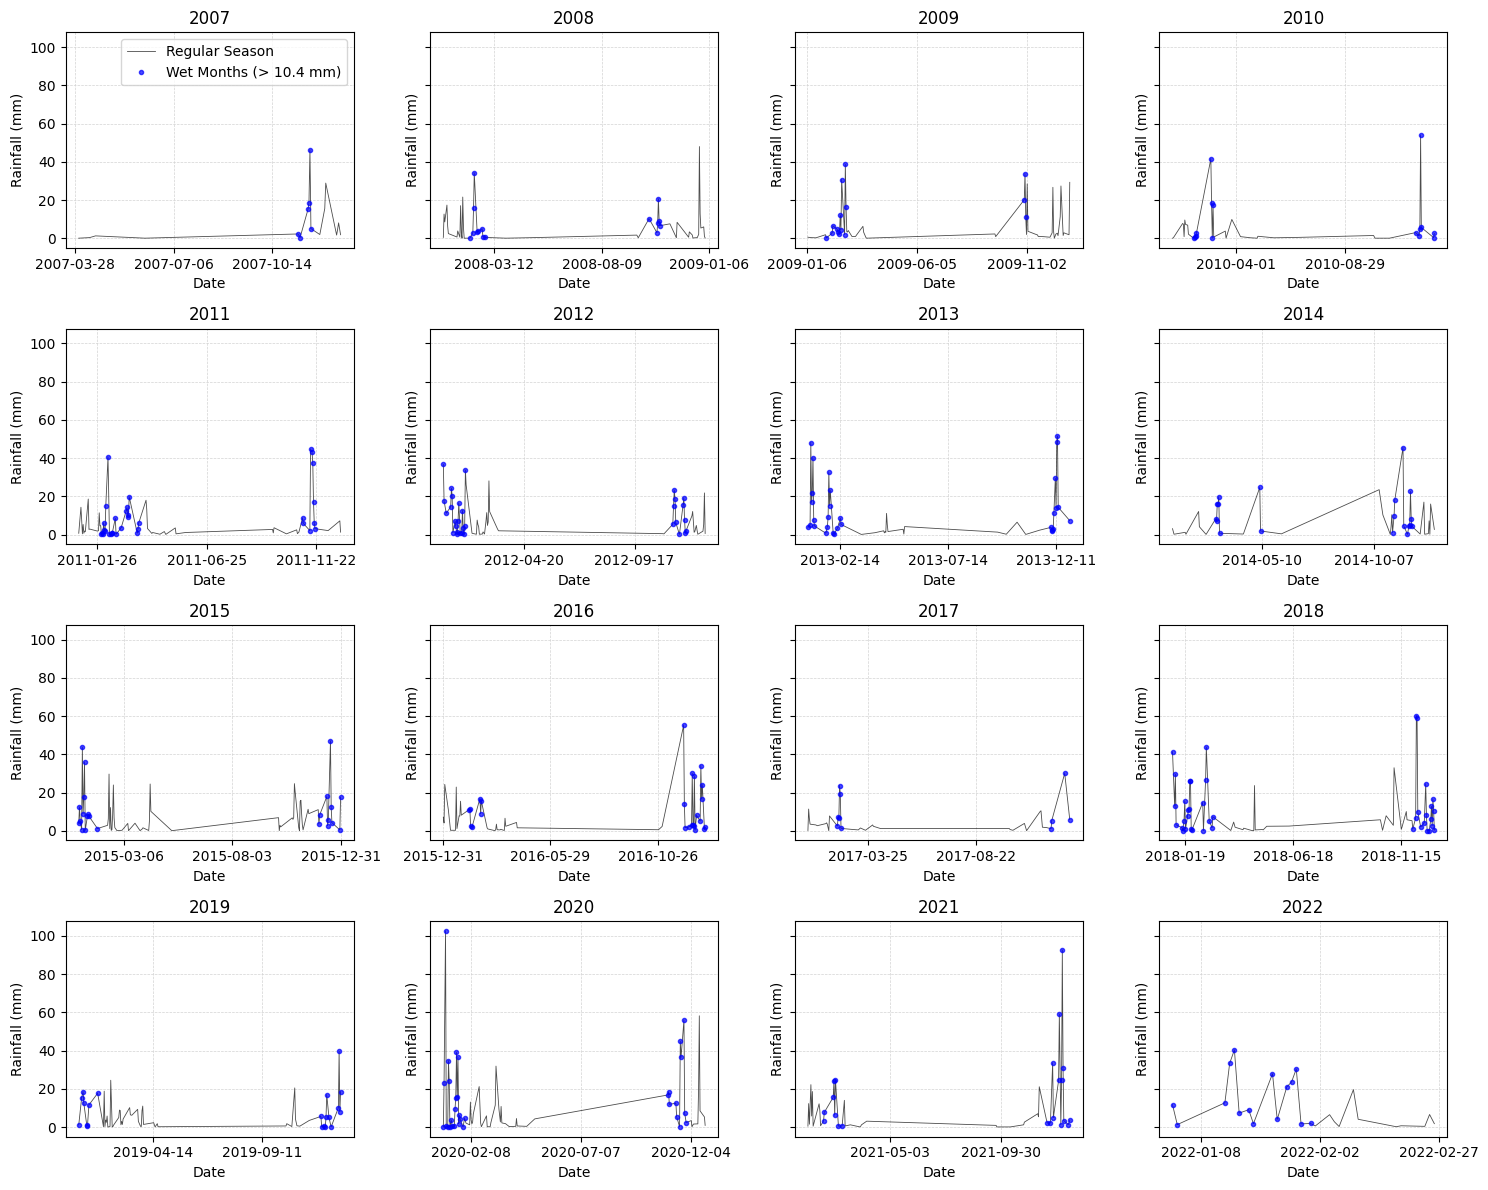

In [ ]:
# group data by year and month to calculate average monthly rainfall
monthly_rainfall = data.groupby([data['Year'], data['Date'].dt.month])['Rainfall'].mean()

# create smaller subplots for each year
years = sorted(data['Year'].unique())
num_years = len(years)
cols = 4
rows = (num_years + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 3), sharey=True)
axes = axes.flatten()

all_wet_months = []

for i, year in enumerate(years):
    # filter data for the specific year
    year_data = data[data['Year'] == year]

    # calc 75th percentile for "wet" months in this year
    year_monthly_rainfall = monthly_rainfall.loc[year]
    rainfall_threshold = year_monthly_rainfall.quantile(0.75)

    # identify "wet" months
    wet_months = year_monthly_rainfall[year_monthly_rainfall >= rainfall_threshold].index
    all_wet_months.append((year, wet_months))

    # mask for "wet" months
    wet_mask = year_data['Date'].dt.month.isin(wet_months)

    # daily rainfall for the year
    ax = axes[i]
    ax.plot(year_data['Date'], year_data['Rainfall'], label='Regular Season', color='black', alpha=0.7, linewidth=0.6)
    ax.plot(year_data['Date'][wet_mask], year_data['Rainfall'][wet_mask], '.', color='blue', label=f"Wet Months (> {rainfall_threshold:.1f} mm)", alpha=0.7)

    ax.set_title(f"{year}")
    ax.set_xlabel("Date")
    ax.set_ylabel("Rainfall (mm)")
    ax.grid(color = 'lightgray', linestyle = '--', linewidth = 0.5)
    ax.xaxis.set_major_locator(plt.MaxNLocator(3))

    if i == 0:
        ax.legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
# months identified as wet
print("\n\033[1mMonths identified as wintert based on rainfall patterns:\033[0m\n")
for year, wet_months in all_wet_months:
    months_str = ", ".join([f"\033[94m{month:02d}\033[0m" for month in wet_months])
    print(f"\033[92mYear {year}:\033[0m Wet months: {months_str}")


Months identified as wintert based on rainfall patterns:

Year 2007: Wet months: 11
Year 2008: Wet months: 02, 10
Year 2009: Wet months: 02, 10
Year 2010: Wet months: 02, 12
Year 2011: Wet months: 02, 03, 11
Year 2012: Wet months: 01, 11
Year 2013: Wet months: 01, 02, 12
Year 2014: Wet months: 03, 05, 11
Year 2015: Wet months: 01, 12
Year 2016: Wet months: 02, 12
Year 2017: Wet months: 02, 12
Year 2018: Wet months: 01, 02, 12
Year 2019: Wet months: 01, 12
Year 2020: Wet months: 01, 11
Year 2021: Wet months: 02, 12
Year 2022: Wet months: 01


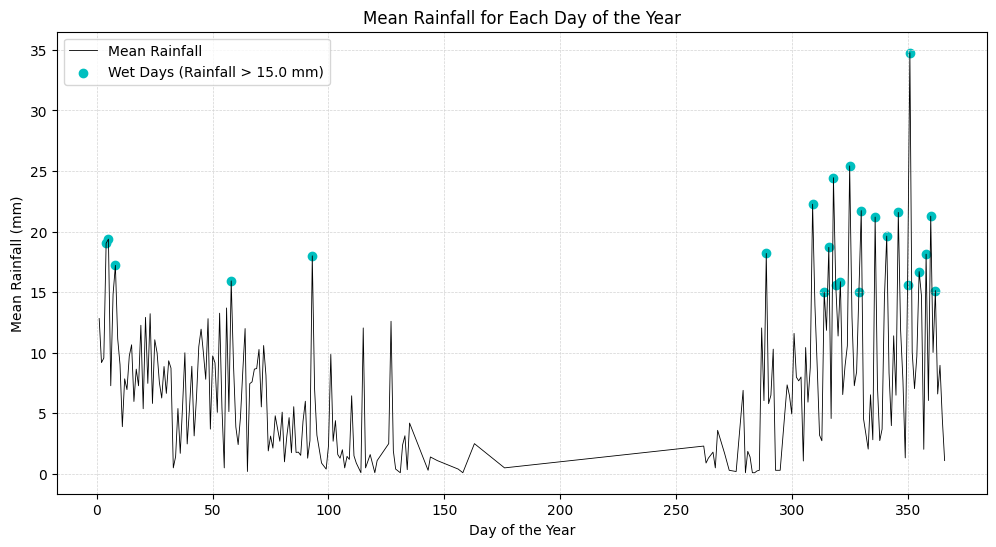

In [ ]:
# mean rainfall for each day of the year across all years
daily_mean_rainfall = data.groupby('DayOfYear')['Rainfall'].mean()

plt.figure(figsize=(12, 6))
plt.plot(daily_mean_rainfall.index, daily_mean_rainfall.values, color='black', linewidth=0.6, label='Mean Rainfall')

# highlight the wettest days (e.g., top 10% of mean rainfall)
rainfall_threshold = daily_mean_rainfall.quantile(0.9)
wet_days = daily_mean_rainfall[daily_mean_rainfall >= rainfall_threshold]
plt.scatter(wet_days.index, wet_days.values, color='c', label=f'Wet Days (Rainfall > {rainfall_threshold:.1f} mm)')

plt.title("Mean Rainfall for Each Day of the Year")
plt.xlabel("Day of the Year")
plt.ylabel("Mean Rainfall (mm)")
plt.legend()
plt.grid(color = 'lightgray', linestyle = '--', linewidth = 0.5)
plt.show()

According the internet winter in IL is from November - March


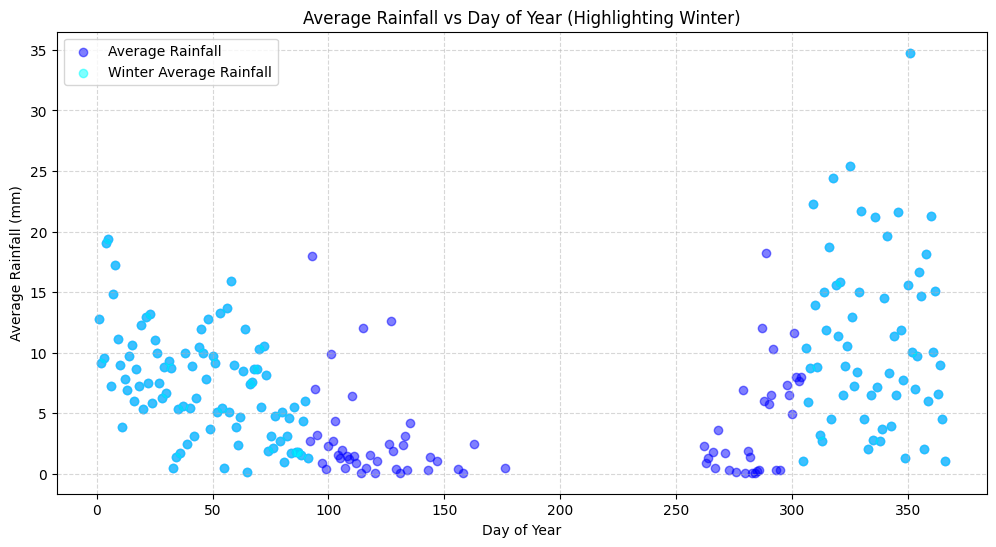

In [ ]:
# calc the average rainfall for each day of the year
daily_average_rainfall = data.groupby('DayOfYear')['Rainfall'].mean()

# plot the scatter plot for the average rainfall
plt.figure(figsize=(12, 6))
plt.scatter(daily_average_rainfall.index, daily_average_rainfall.values, color='blue', alpha=0.5, label="Average Rainfall")

# highlight winter months (November - March)
winter_days = [1, 2, 3, 11, 12]
winter_mask = daily_average_rainfall.index.isin(data[data['Month'].isin(winter_days)]['DayOfYear'].unique())
plt.scatter(daily_average_rainfall.index[winter_mask], daily_average_rainfall.values[winter_mask], color='cyan', alpha=0.5, label="Winter Average Rainfall")

plt.xlabel("Day of Year")
plt.ylabel("Average Rainfall (mm)")
plt.title("Average Rainfall vs Day of Year (Highlighting Winter)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()


In [ ]:
# create the features for the linear model
data['CosTerm'] = np.cos(2 * np.pi * data['DayOfYear'] / 365)
data['SinTerm'] = np.sin(2 * np.pi * data['DayOfYear'] / 365)

y = data['Rainfall']
X_full = sm.add_constant(data[['CosTerm', 'SinTerm']])  # Full model predictors
X_trivial = sm.add_constant(np.ones(len(data)))        # Trivial model (intercept only)

# fit the full model
full_model = sm.OLS(y, X_full).fit()

# fit the trivial model
trivial_model = sm.OLS(y, X_trivial).fit()

# compare the models using an F-test
f_test_result = full_model.compare_f_test(trivial_model)

# extract p-values for each parameter in the full model
p_values = full_model.pvalues

f_test_result, p_values

((22.48433869494974, 3.1604632030878105e-10, 2.0),
 const      2.177776e-09
 CosTerm    2.878985e-08
 SinTerm    6.579567e-02
 dtype: float64)

In [ ]:
# F-test result and p-values
alpha = 0.01
if f_test_result[1] < alpha:
    print("The full model significantly improves upon the trivial model.")
else:
    print("No significant improvement with the full model.")

print("\nP-values for the full model parameters:")
print(p_values)

The full model significantly improves upon the trivial model.

P-values for the full model parameters:
const      2.177776e-09
CosTerm    2.878985e-08
SinTerm    6.579567e-02
dtype: float64


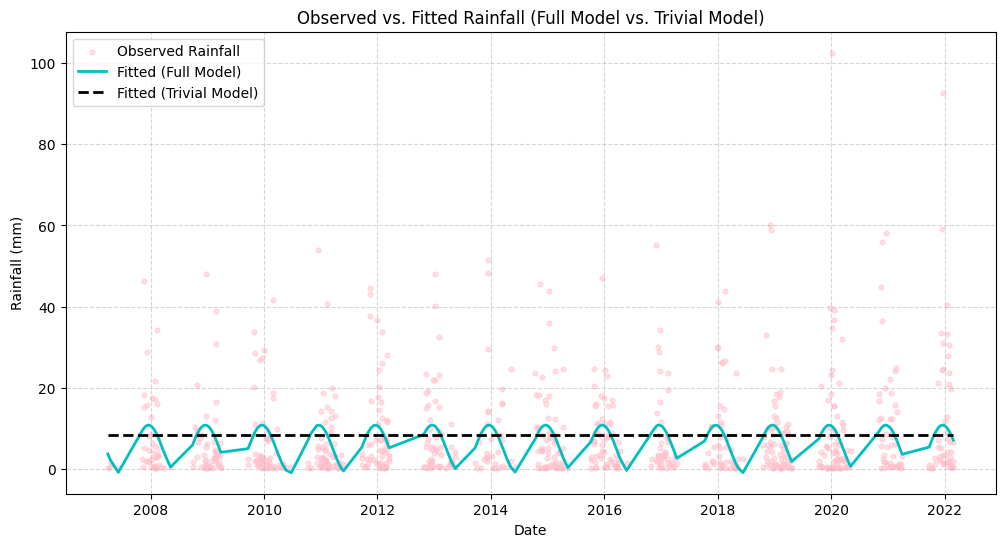

In [ ]:
# Add fitted values to the dataset
data['fitted_full'] = full_model.predict(X_full)
data['fitted_trivial'] = trivial_model.predict(X_trivial)

plt.figure(figsize=(12, 6))
plt.scatter(data['Date'], data['Rainfall'], label='Observed Rainfall', color='pink', alpha=0.5, s=12)
plt.plot(data['Date'], data['fitted_full'], label='Fitted (Full Model)', color='c', linewidth=2)
plt.plot(data['Date'], data['fitted_trivial'], label='Fitted (Trivial Model)', color='black', linestyle='--', linewidth=2)
plt.title("Observed vs. Fitted Rainfall (Full Model vs. Trivial Model)")
plt.xlabel("Date")
plt.ylabel("Rainfall (mm)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

As we can see from the results:

$$F- statistic = 22.48$$
$$ p -value = 3.160463e^{-10} $$
$$Dof = 2 $$

From this we can see that the full model explains 22.48 times more variance compared to the trivial model. This is a large $F -statistic$ that indicates that the additional predictors in the full model significantly improve the model's explanatory power.

Forthermore the $p-value$ associated with this $F -statistic$ is very small. This confirms that the improvement in fit by including $cos$ and $sin$terms is statistically significant at any conventional significance level $α=0.01$.

In [ ]:
# extract p-values from the full model
p_values = full_model.pvalues

# check significance for each parameter
for param, p_val in p_values.items():
    if p_val < alpha:
        print(f"{param}: p = {p_val:.5f} (Significant at alpha = {alpha})")
    else:
        print(f"{param}: p = {p_val:.5f} (Not significant at alpha = {alpha})")

const: p = 0.00000 (Significant at alpha = 0.01)
CosTerm: p = 0.00000 (Significant at alpha = 0.01)
SinTerm: p = 0.06580 (Not significant at alpha = 0.01)


### 2

First we will show that

$$Cov(y-\hat{y} \ , y_{new}-\hat{y}_{new}) = 0  $$



$$y-\hat{y} = (I-H)y $$

$$y_{new}-\hat{y}_{new} = y_{new}-Z_{new}(Z^TZ)^{-1}Z^Ty =$$
$$Z_{new}β + ɛ_{new} - Z_{new}(Z^TZ)^{-1}Z^T(Zβ+ɛ) =
Z_{new}β + ɛ_{new}  - Z_{new}(Z^TZ)^{-1}Z^T(Zβ)- Z_{new}(Z^TZ)^{-1}Z^Tɛ =
Z_{new}β + ɛ_{new}  - Z_{new}β - Z_{new}(Z^TZ)^{-1}Z^Tɛ=
ɛ_{new} - Z_{new}(Z^TZ)^{-1}Z^Tɛ=
$$  


From this we get:

$$Cov(y-\hat{y} \ , y_{new}-\hat{y}_{new}) =$$
$$Cov((I-H)y \ , ɛ_{new} - Z_{new}(Z^TZ)^{-1}Z^Tɛ) = $$
$$Cov((I-H)(Zβ +ɛ) \ , ɛ_{new} - Z_{new}(Z^TZ)^{-1}Z^Tɛ) =$$
$$Cov((I-H)ɛ \ , ɛ_{new} - Z_{new}(Z^TZ)^{-1}Z^Tɛ) = $$
$$Cov((I-H)ɛ \ , ɛ_{new}) - Cov((I-H)ɛ \ ,Z_{new}(Z^TZ)^{-1}Z^Tɛ) $$



Note:
- $HZ = Z$ then $(I-H)Z = Z-Z =0 $
- $ Cov((I-H)ɛ \ , ɛ_{new}) = 0$ since $ɛ$ and $ɛ_{new}$ are independent.
- $(I-H)$ project $ɛ$ orthogonally to the column space of $Z$, while $(Z^TZ)^{-1}Z^T$ lies in the column space of $Z$. From this we can conclude that $Cov((I-H)ɛ \ ,Z_{new}(Z^TZ)^{-1}Z^Tɛ)=0$

From this we get:

$$Cov(y-\hat{y} \ , y_{new}-\hat{y}_{new}) = 0  $$

Now we need to find M s.t  
$$
M(y_{new} - \hat{y}_{new}) \sim \mathcal N(0, \sigma^2 I_n).
$$

first

$$r_{new}=y_{new} - \hat{y}_{new} = (Z_{new}β + ɛ_{new}) - Z_{new}(Z^TZ)^{-1}Zy =
(Z_{new}β + ɛ_{new}) - Z_{new}(Z^TZ)^{-1}Z(Z\beta + ɛ)=
Z_{new}β + ɛ_{new} - Z_{new}(Z^TZ)^{-1}Z^TZβ - Z_{new}(Z^TZ)^{-1}Z^Tɛ$$

\
Since $(Z^TZ)^{-1}Z^TZ = I$ Then, $Z_{new}(Z^TZ)^{-1}Z^TZβ= Z_{new}β $.

Then we get:
$$r_{new}= ɛ_{new} - Z_{new}(Z^TZ)^{-1}Z^Tɛ $$
\
Now lets calc the $Cov(r_{new})$:
$$Cov(r_{new})= Cov(ɛ_{new}) + Cov(Z_{new}(Z^TZ)^{-1}Z^Tɛ) $$

$$ Cov(ɛ_{new}) = σ^2I_n $$

$$
Cov(Z_{new}(Z^TZ)^{-1}Z^Tɛ) = σ^2Z_{new}(Z^TZ)^{-1}Z^T_{new}
$$

Since $ɛ$ and $ɛ_{new}$ are independent, the cross-covariance is zero.

Thus we get,

$$
Cov(r_{new}) = σ^2(I_n + Z_{new}(Z^TZ)^{-1}Z^T_{new})
$$

$C = I_n + Z_{new}(Z^TZ)^{-1}Z^T_{new} $

The matrix M needs to standardize $r_{new}$ so that:

$$
Mr_{new} \sim \mathcal N(0, \sigma^2 I_n).
$$

This means that

$$Cov(Mr_{new}) = M·Cov(r_{new})M^T = σ^2I_n $$

$$M·σ^2C·M^T = σ^2I_n $$

$$ M·C·M^T = I_n $$

For $M=C^{-\frac{1}{2}}$ we get:

$$ C^{-\frac{1}{2}}·C·C^{-\frac{1}{2}} = I_n $$


Now we will find the distribution of the ratio A.

We will first look at the numerator of A:

$$ \frac{1}{n}||M(y_{new}-\hat{y}_{new})||^2 $$

Under the null hypothesis we know that:

$$ r_{new} = y_{new}-\hat{y}_{new} \sim \mathcal N(0, \sigma^2C)$$

Where $C = I_n + Z_{new}(Z^TZ)^{-1}Z_{new}^T $ and $M = C^{-1/2}$

$$ Mr_{new} \sim \mathcal N(0 ,\sigma^2I_n),$$

$$ \frac{1}{n}||M(y_{new}-\hat{y}_{new})||^2 =\frac{1}{n}\sum_{i=1}^n\frac{z_i^2}{σ^2}$$

and since $z_i$ normaly distributs we can conclude that:

$$ \frac{1}{n}||M(y_{new}-\hat{y}_{new})||^2 \sim  \frac{σ^2}{n} \mathcal X_n^2 $$

Now we need to look at the denominator:

$$ y -\hat{y} \sim \mathcal N(0, \sigma^2(I_m - H)) $$

and the rank of $I_m -H$ is $m-d$

from this we can see that
$$\frac{1}{m-d}||y -\hat{y}||^2 \sim \frac{σ^2}{m-d} \mathcal X_{m-d}^2$$

Now we can combine all the clac together and get:

$$A = \frac{\frac{σ^2}{n} \mathcal X_n^2}{\frac{σ^2}{m-d} \mathcal X_{m-d}^2} =
\frac{\frac{1}{n} \mathcal X_n^2}{\frac{1}{m-d} \mathcal X_{m-d}^2} $$

From this we see that

$$A \sim F(n.m-d)$$

In [ ]:
# Initialize storage for p-values and years
years = range(2010, 2022)
p_values = []

In [ ]:
data

,StationCode,Date,Rainfall,DayOfYear,Month,Year,CosTerm,SinTerm,fitted_full,fitted_trivial
0,136320,2007-04-01,0.1,91,4,2007,0.004304,0.999991,3.653271,8.303238
1,136320,2007-04-12,0.4,102,4,2007,-0.183998,0.982927,2.590253,8.303238
2,136320,2007-04-18,1.3,108,4,2007,-0.284359,0.958718,2.042494,8.303238
3,136320,2007-06-07,0.1,158,6,2007,-0.912375,0.409356,-0.890063,8.303238
4,136320,2007-11-09,2.3,313,11,2007,0.625411,-0.780296,9.444901,8.303238
...,...,...,...,...,...,...,...,...,...,...
798,136320,2022-02-18,0.2,49,2,2022,0.664855,0.746972,7.771601,8.303238
799,136320,2022-02-19,0.7,50,2,2022,0.651899,0.758306,7.682894,8.303238
800,136320,2022-02-24,0.4,55,2,2022,0.584298,0.811539,7.227405,8.303238
801,136320,2022-02-25,6.6,56,2,2022,0.570242,0.821477,7.134105,8.303238


In [ ]:
# loop through each year for hypothesis testing
for year in years:
    # Split data into training & testing
    train_data = data[data['Year'] < year]
    test_data = data[data['Year'] == year]

    # design matrices
    Z = sm.add_constant(train_data[['CosTerm', 'SinTerm']].to_numpy())  # training features
    Y = train_data['Rainfall'].to_numpy().reshape(-1, 1)        # training target
    Z_new = sm.add_constant(test_data[['CosTerm', 'SinTerm']].to_numpy())  # testing features
    Y_new = test_data['Rainfall'].to_numpy().reshape(-1, 1)        # testing target

    # fiting the model
    beta_hat = np.linalg.inv(Z.T @ Z) @ Z.T @ Y
    Y_hat = Z @ beta_hat
    Y_new_hat = Z_new @ beta_hat

    # calc residuals
    res_train = Y - Y_hat
    res_test = Y_new - Y_new_hat

    # calc statistic A
    n, m = len(Y_new), len(Y)  # n = test size, m = train size
    d = Z.shape[1]             # Number of predictors
    A_num = (1 / n) * np.sum(res_test**2)
    A_den = (1 / (m - d)) * np.sum(res_train**2)
    A = A_num / A_den

    # calc  p-value
    p_value = 1 - f.cdf(A, n, m - d)
    p_values.append(p_value)

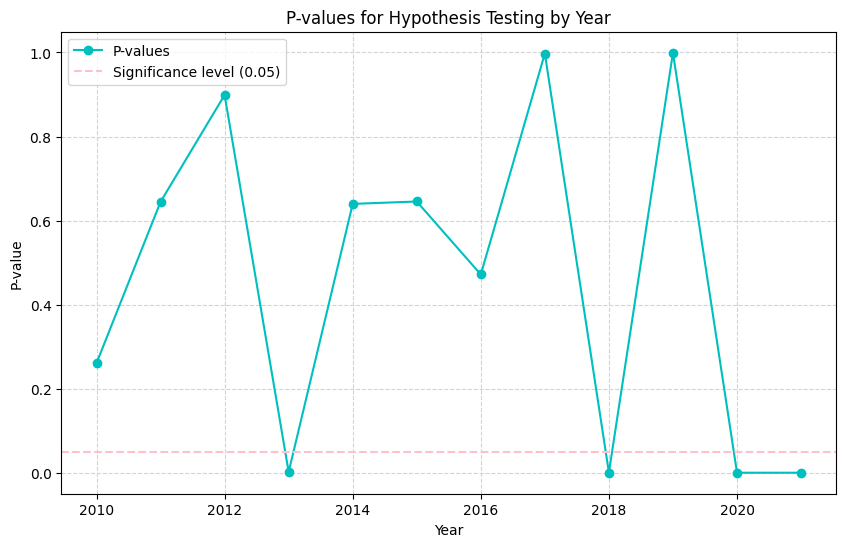

,Year,P-value
0,2010,2.605704e-01
1,2011,6.445207e-01
2,2012,8.987999e-01
3,2013,1.781490e-03
4,2014,6.396425e-01
5,2015,6.453502e-01
6,2016,4.717180e-01
7,2017,9.974697e-01
8,2018,4.951518e-04
9,2019,9.993431e-01


In [ ]:
# p-values
plt.figure(figsize=(10, 6))
plt.plot(years, p_values, marker='o', color = 'c' ,label='P-values')
plt.axhline(0.05, color='pink', linestyle='--', label='Significance level (0.05)')
plt.xlabel("Year")
plt.ylabel("P-value")
plt.title("P-values for Hypothesis Testing by Year")
plt.legend()
plt.grid(linestyle='--', color = 'lightgray')
plt.show()

# p-values for each year
p_values_output = pd.DataFrame({'Year': years, 'P-value': p_values})
p_values_output

Rejecting the null hypothesis (i.e., obtaining very small p-values) does not necessarily mean that the rainfall distribution changes over time. A small p-value only indicates that the rainfall pattern in the test year significantly deviates from the model built using prior years' data. This may be due to random fluctuations or unusual events instead of a real shift in rainfall patterns over time. We need to do more analysis, like looking into trends or outside influences, to better understand long-term changes.

### 3

In this part ee aim to test the hypothesis that December has more total rainfall than February under the assumption that the rainfall distribution does not change across years. We will use two statistical tests: the two-sample t-test and the paired t-test.

\
**Assumptions:**

- The total monthly rainfall (December and February) is assumed to follow a normal distribution.

- Rainfall measurements are independent across years.

- Variance of the rainfall in December and February is approximately equal for the two-sample t-test.

- For the paired t-test, we assume that rainfall in December and February can be paired year by year for comparison.


**Hypotheses:**
- Null Hypothesis: The mean total rainfall in December is equal to the mean total rainfall in February.

$$H_o : μ_{December} = μ_{February} $$

- Alternative Hypothesis: The mean total rainfall in December is greater than in February.

$$H_1 :  μ_{December} > μ_{February}$$

$ \ $

**Two-Sample t-test:**

In two-sample t-test we compares the means of two independent samples, in our case December and February, across all years.

what we are need to do:

1. Extract the total rainfall for December and February across all years.

2. Treat the two samples (December and February) as independent.

3. Use the two-sample t-test (one-tailed, testing if December is rainier than February).

$$ t = \frac{\bar{x_1}-\bar{x_2}}{s_p \sqrt(\frac{1}{n_1}+\frac{1}{n_2})} $$

$ \ $

**Paired t-test:**

In paired t-test we compares the mean difference in total rainfall between December and February for each year. This test accounts for year-to-year variations.


what we are need to do:
1. For each year, compute the difference in total rainfall between December and February.

$$d_i = RainFall_{December \ , year_i} - RainFall_{February \ , year_i} $$

2. Perform the paired t-test on the set of differences

$$t = \frac{\bar{d}}{\frac{s_d}{\sqrt{n}}} $$


**Which Approach Is More Appropriate?**

We think that the Paired t-test is more appropriate in our case because the rainfall data for December and February within the same year are not independent. They are paired observations. The paired t-test accounts for this dependency, reducing noise caused by year-to-year variability. In contrast, the two-sample t-test assumes that the rainfall in December and February is independent, which may not hold because both months are part of the same year and influenced by the same seasonal patterns. This method does not account for year-to-year variability.



**Lets try to implement the tests and see the results:**

In [ ]:
# Filter data for December (Month 12) and February (Month 2)
december_data = data[data['Month'] == 12]
february_data = data[data['Month'] == 2]

# Group by year and calculate total rainfall for December and February
december_totals = december_data.groupby('Year')['Rainfall'].sum().reset_index(name='DecemberRainfall')
february_totals = february_data.groupby('Year')['Rainfall'].sum().reset_index(name='FebruaryRainfall')

# Merge the two datasets to align rainfall totals by year
rainfall_totals = pd.merge(december_totals, february_totals, on='Year', how='inner')

In [ ]:
# Extract rainfall values for the tests
december_rainfall = rainfall_totals['DecemberRainfall']
february_rainfall = rainfall_totals['FebruaryRainfall']

# Two-sample t-test
two_sample_ttest = ttest_ind(december_rainfall, february_rainfall)

# Paired t-test
paired_ttest = ttest_rel(december_rainfall, february_rainfall)


# # res
print("Paired t-test (normalized monthly totals):")
print(f"T-statistic: {paired_ttest[0]:.4f}, P-value: {paired_ttest[1]:.4f}")

print("\nTwo-sample t-test (daily rainfall observations):")
print(f"T-statistic: {two_sample_ttest[0]:.4f}, P-value: {two_sample_ttest[1]:.4f}")


Paired t-test (normalized monthly totals):
T-statistic: 2.2131, P-value: 0.0454

Two-sample t-test (daily rainfall observations):
T-statistic: 2.0656, P-value: 0.0490


In the results shown above we can see that both tests result in p-values below the standard significance level of $α = 0.05$. This means that we have evidence to reject the null hypothesis.

